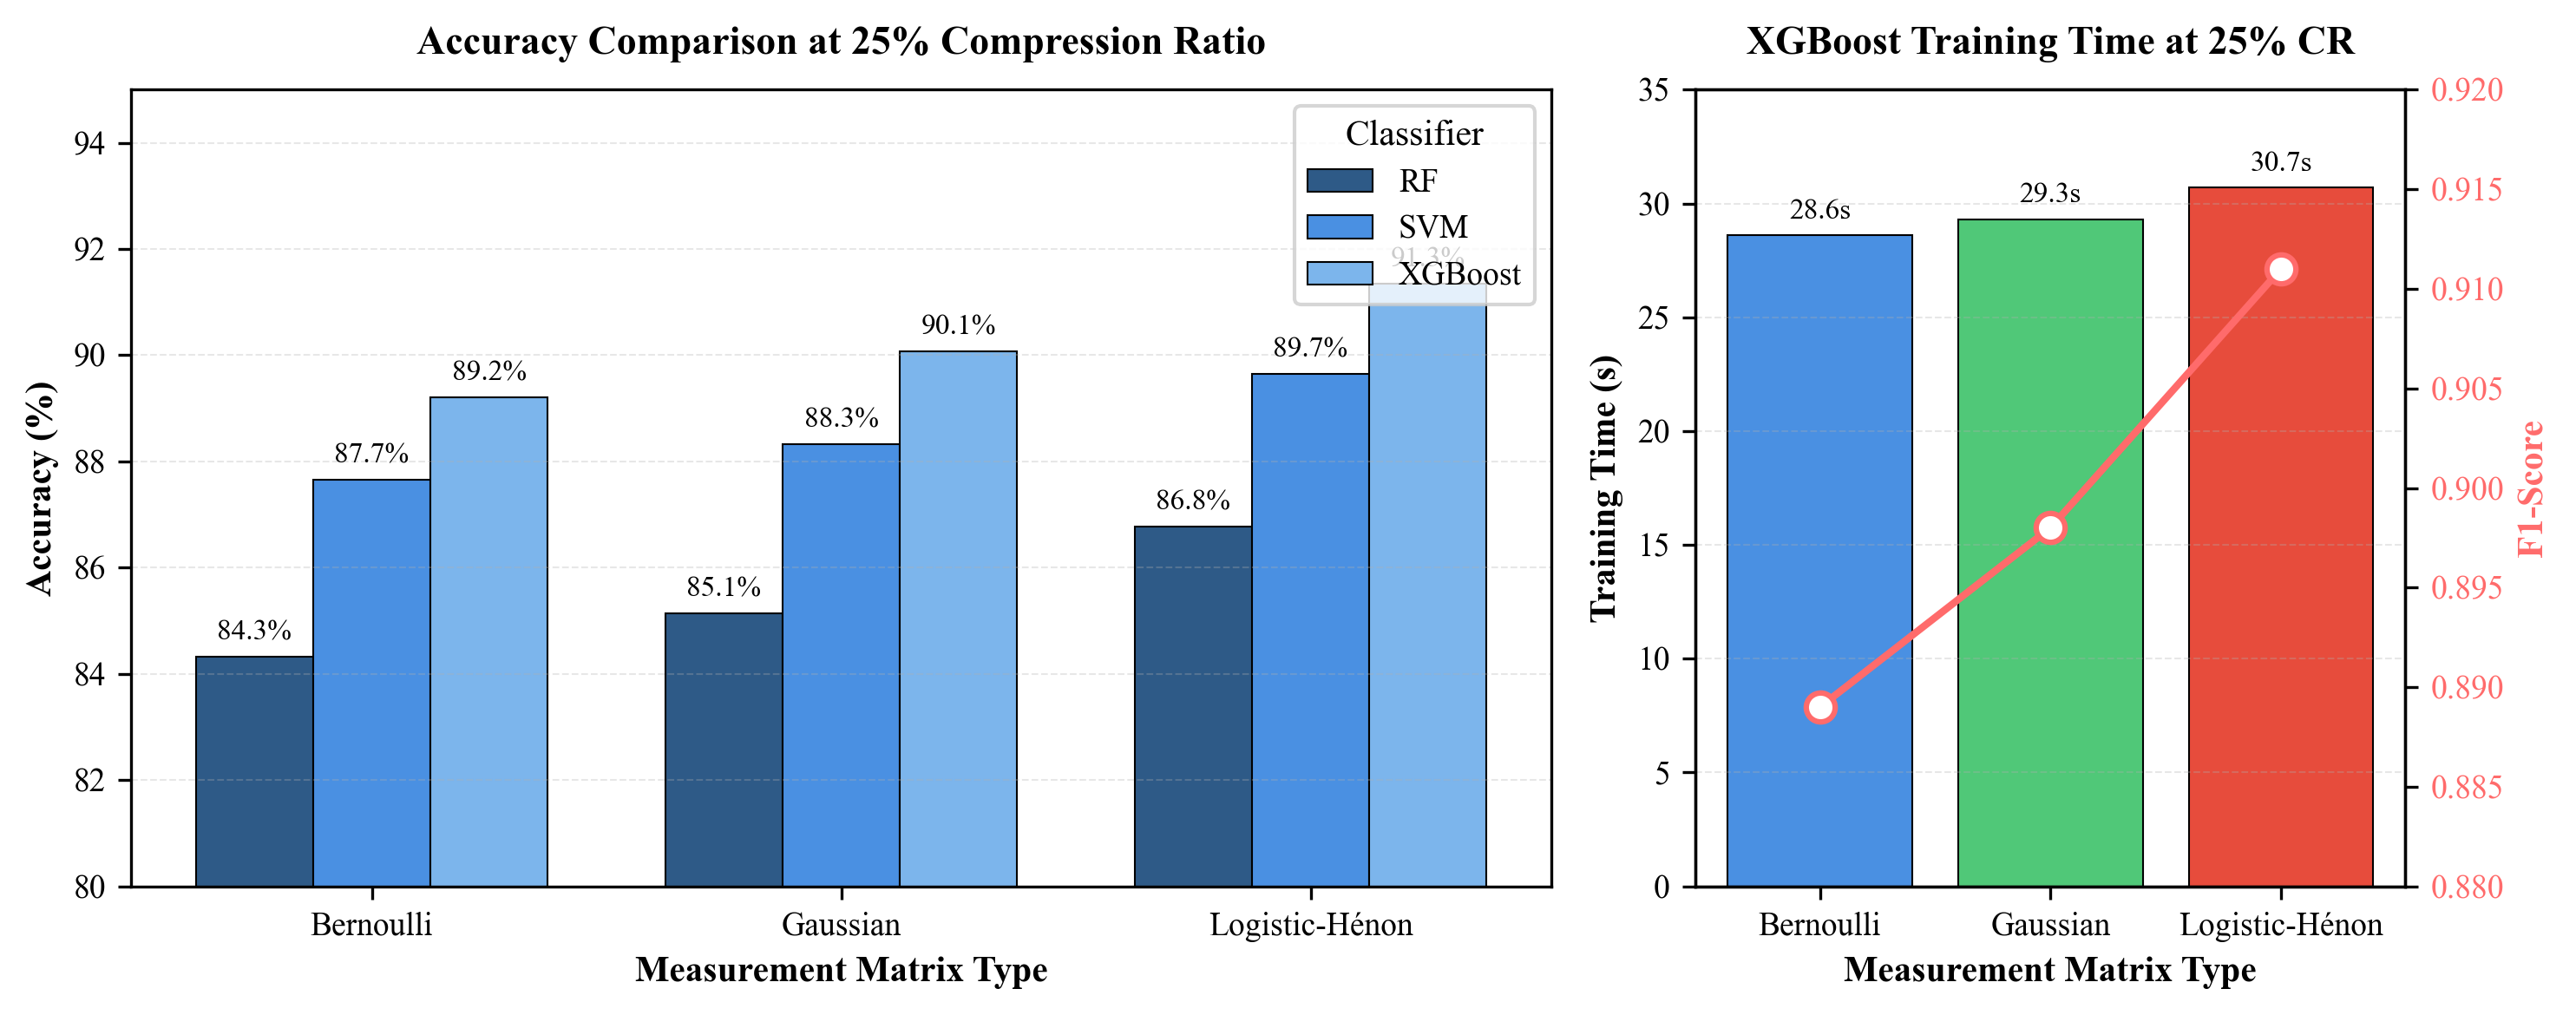

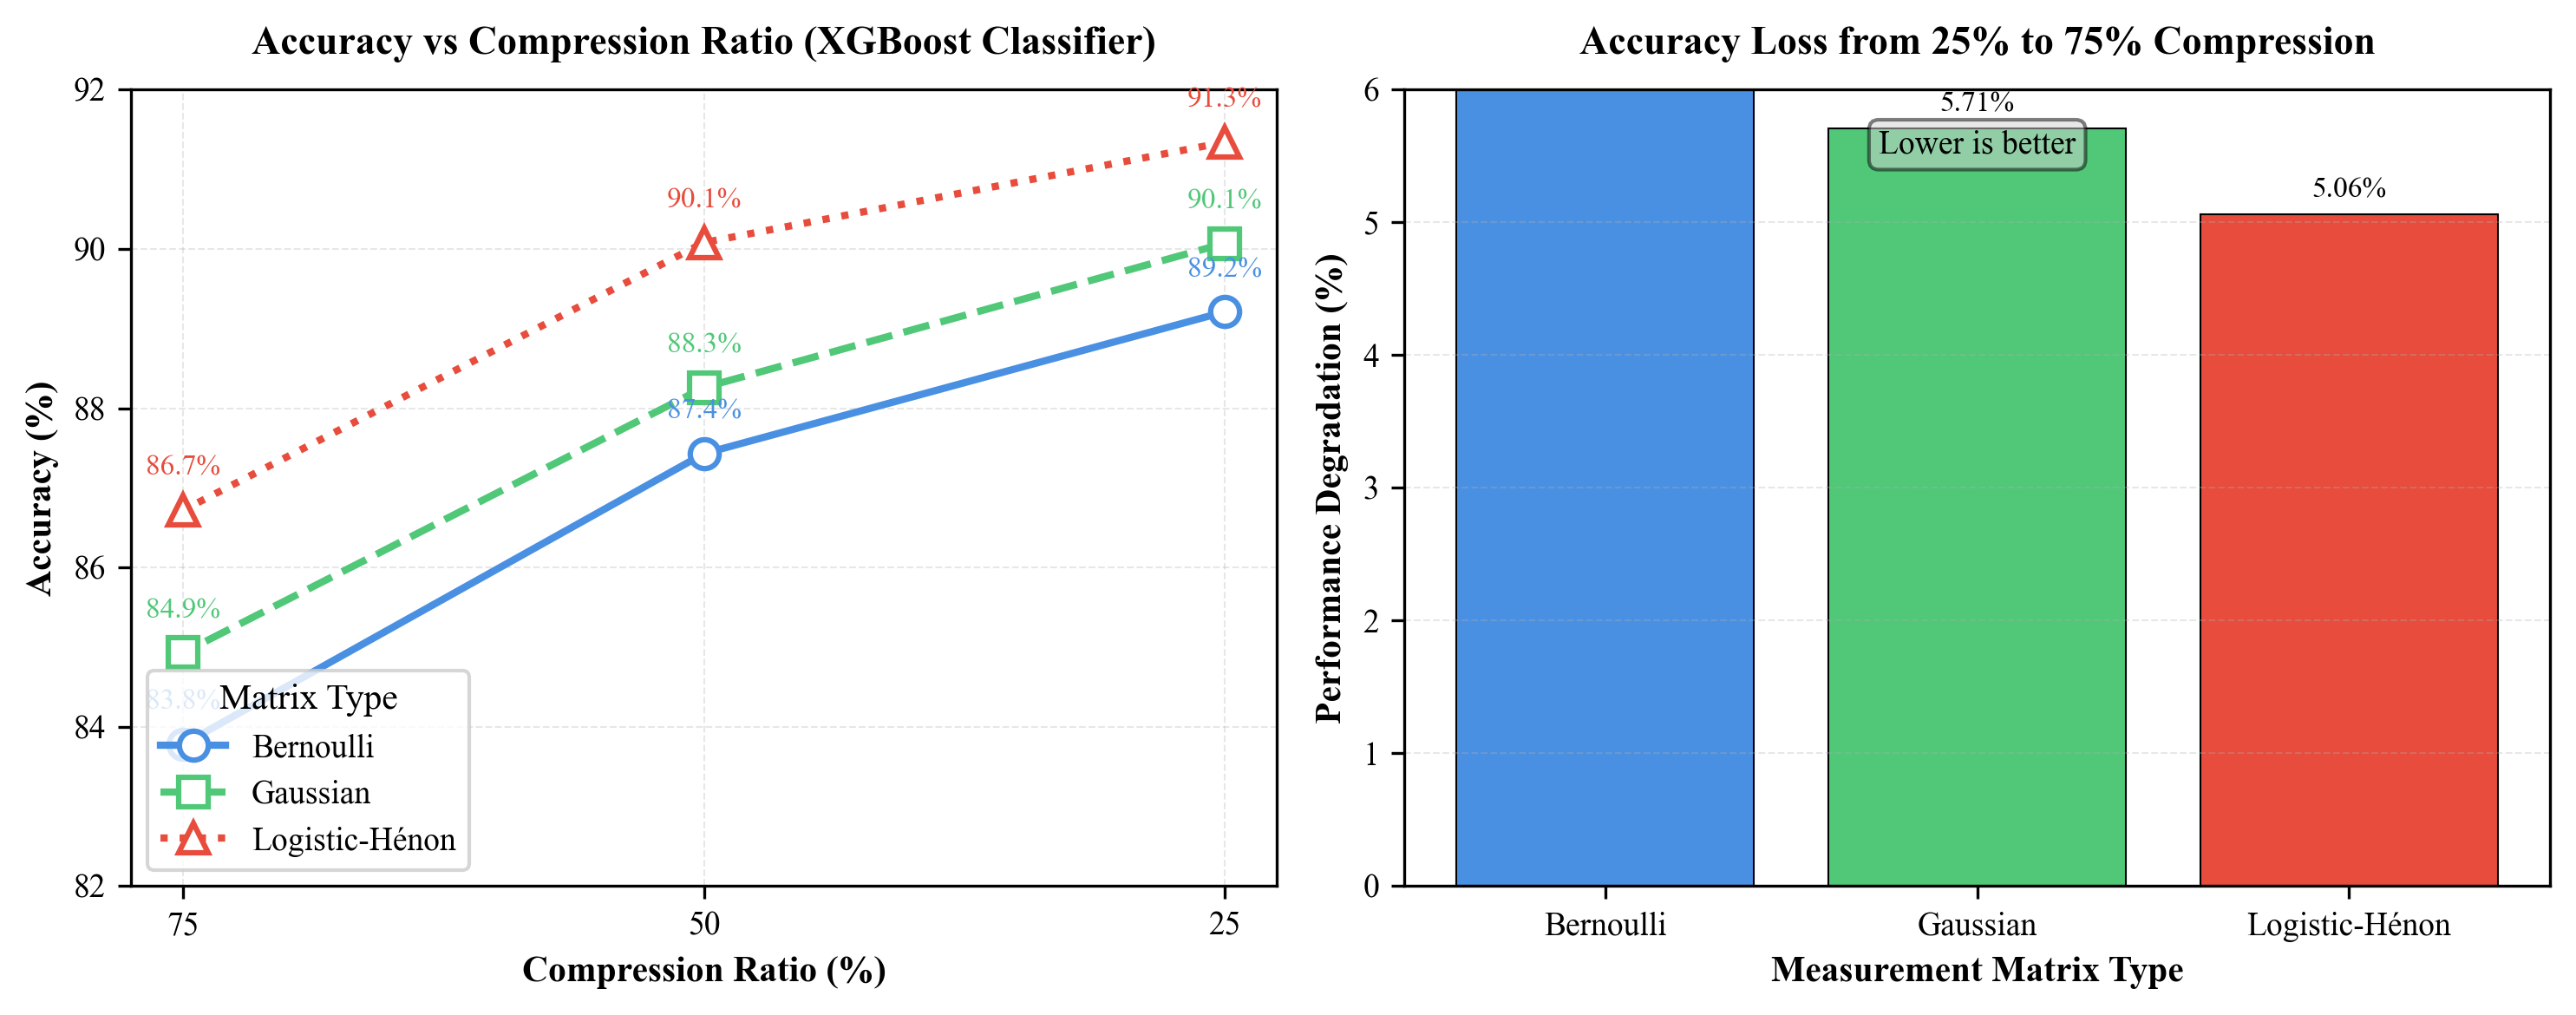

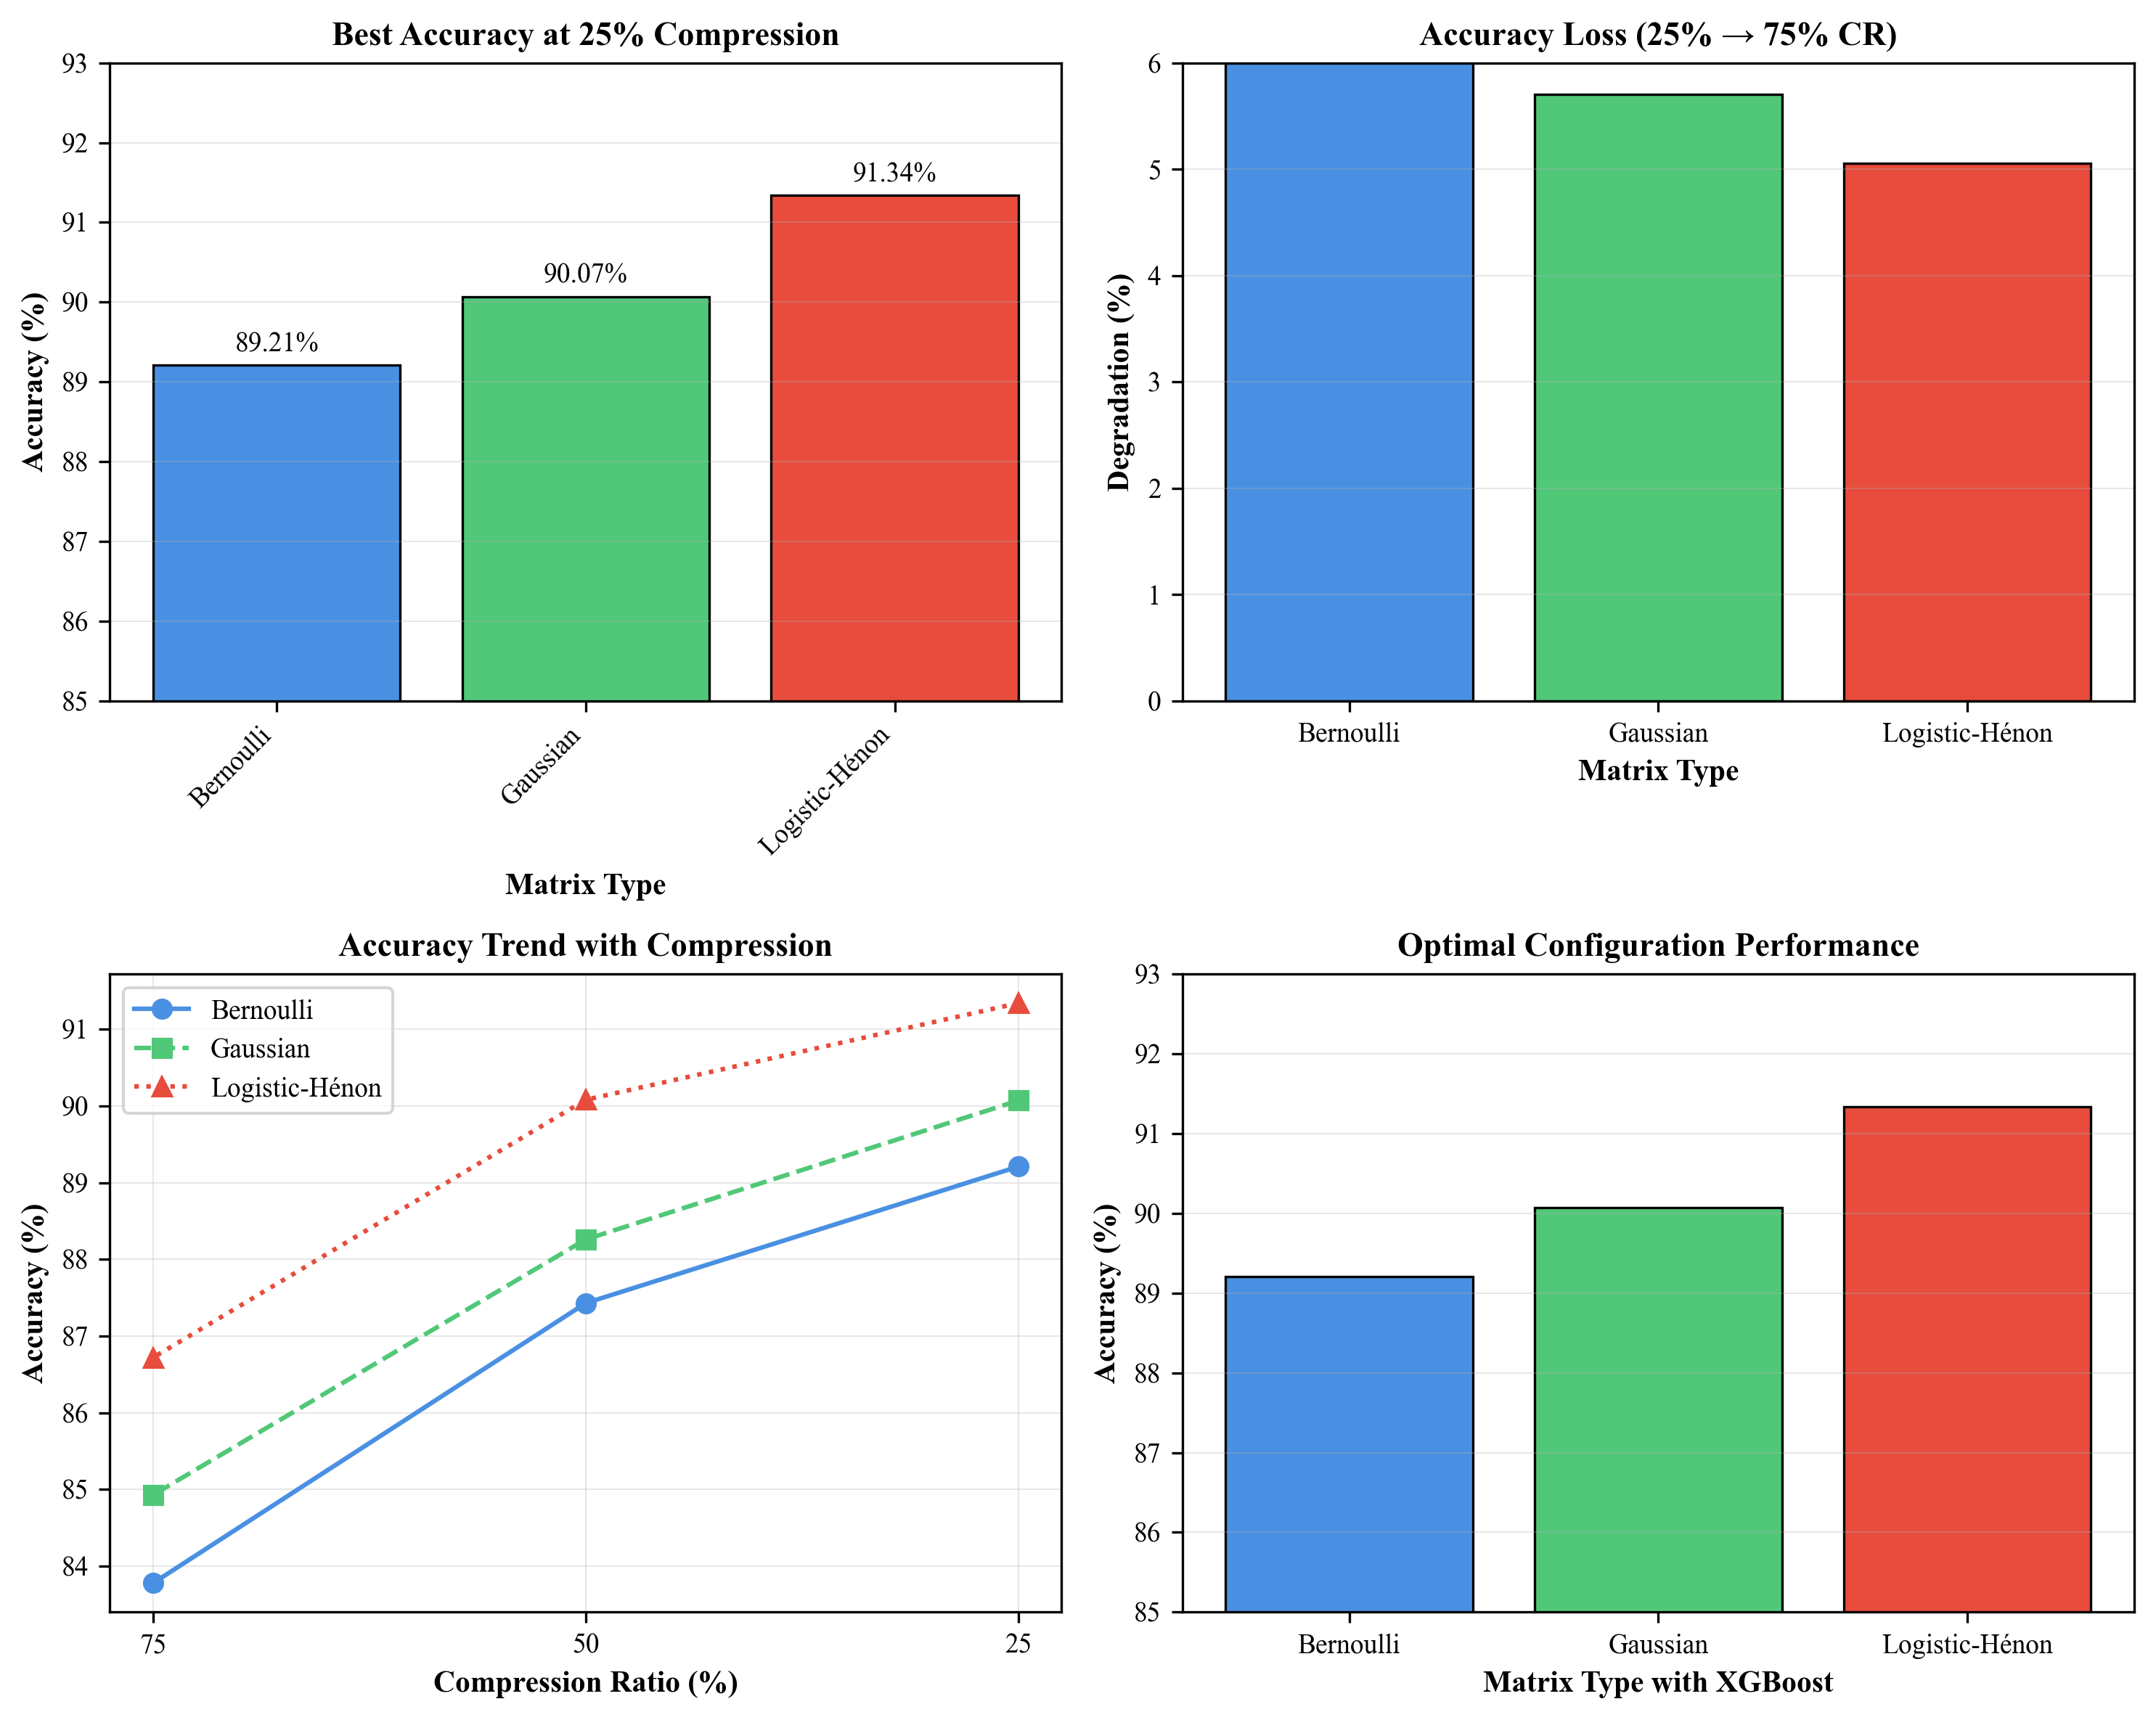

Figures generated successfully!
1. figure1_bar_chart_comparison.pdf/png - Main bar chart comparison
2. figure2_performance_vs_compression.pdf/png - Line plot vs compression
3. figure3_compact_summary.pdf/png - Compact 2x2 summary


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Set style for IEEE publication
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'legend.fontsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5
})

# Set color palette for IEEE (grayscale friendly)
colors = ['#2E5A87', '#4A90E2', '#7CB5EC']  # Blue shades
matrix_colors = ['#4A90E2', '#50C878', '#E74C3C']  # Blue, Green, Red

# Generate dummy data
matrices = ['Bernoulli', 'Gaussian', 'Logistic-Hénon']
classifiers = ['RF', 'SVM', 'XGBoost']
compression_ratios = [25, 50, 75]

# Best accuracy for each matrix (highest among classifiers)
best_accuracy = {
    'Bernoulli': [89.21, 87.43, 83.78],  # XGBoost values
    'Gaussian': [90.07, 88.26, 84.93],   # XGBoost values
    'Logistic-Hénon': [91.34, 90.08, 86.72]  # XGBoost values
}

# Performance metrics for all classifiers at 25% CR (for bar chart)
accuracy_25 = {
    'Bernoulli': [84.32, 87.65, 89.21],
    'Gaussian': [85.14, 88.32, 90.07],
    'Logistic-Hénon': [86.78, 89.65, 91.34]
}

# Time performance for all classifiers at 25% CR
time_25 = {
    'Bernoulli': [12.4, 89.7, 28.6],
    'Gaussian': [12.1, 91.2, 29.3],
    'Logistic-Hénon': [12.8, 93.5, 30.7]
}

# F1 scores for all classifiers at 25% CR
f1_25 = {
    'Bernoulli': [0.832, 0.874, 0.889],
    'Gaussian': [0.841, 0.882, 0.898],
    'Logistic-Hénon': [0.861, 0.894, 0.911]
}

# ================================================
# FIGURE 1: Bar Chart Comparing Best Results
# ================================================
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})

# Bar chart for accuracy at 25% compression
x = np.arange(len(matrices))
width = 0.25

# Create grouped bars for classifiers
for i, classifier in enumerate(classifiers):
    acc_values = [accuracy_25[matrix][i] for matrix in matrices]
    bars = ax1.bar(x + (i - 1) * width, acc_values, width, 
                   label=classifier, color=colors[i], edgecolor='black', linewidth=0.5)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

ax1.set_xlabel('Measurement Matrix Type', fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Accuracy Comparison at 25% Compression Ratio', fontweight='bold', pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(matrices)
ax1.set_ylim([80, 95])
ax1.grid(True, axis='y', alpha=0.3, linestyle='--')
ax1.legend(title='Classifier', loc='upper right')

# Subplot for training time comparison
time_data = [time_25['Bernoulli'][2], time_25['Gaussian'][2], time_25['Logistic-Hénon'][2]]  # XGBoost times
bars_time = ax2.bar(matrices, time_data, color=matrix_colors, edgecolor='black', linewidth=0.5)

# Add value labels
for i, bar in enumerate(bars_time):
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}s',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

ax2.set_xlabel('Measurement Matrix Type', fontweight='bold')
ax2.set_ylabel('Training Time (s)', fontweight='bold', color='black')
ax2.set_title('XGBoost Training Time at 25% CR', fontweight='bold', pad=10)
ax2.set_ylim([0, 35])
ax2.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add a second y-axis for F1 score on the right
ax2_f1 = ax2.twinx()
f1_data = [f1_25['Bernoulli'][2], f1_25['Gaussian'][2], f1_25['Logistic-Hénon'][2]]
ax2_f1.plot(matrices, f1_data, 'o-', color='#FF6B6B', linewidth=2, markersize=8, 
            markerfacecolor='white', markeredgewidth=1.5)
ax2_f1.set_ylabel('F1-Score', fontweight='bold', color='#FF6B6B')
ax2_f1.set_ylim([0.88, 0.92])
ax2_f1.tick_params(axis='y', labelcolor='#FF6B6B')

plt.tight_layout()
plt.savefig('figure1_bar_chart_comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figure1_bar_chart_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================
# FIGURE 2: Performance vs Compression Ratio
# ================================================
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4))

# Line plot for accuracy vs compression ratio
markers = ['o', 's', '^']  # Different markers for each matrix
line_styles = ['-', '--', ':']  # Different line styles

for i, matrix in enumerate(matrices):
    ax3.plot(compression_ratios, best_accuracy[matrix], 
             marker=markers[i], markersize=8, linewidth=2,
             linestyle=line_styles[i], color=matrix_colors[i],
             label=matrix, markerfacecolor='white', markeredgewidth=1.5)
    
    # Add data point labels
    for j, (x_val, y_val) in enumerate(zip(compression_ratios, best_accuracy[matrix])):
        ax3.annotate(f'{y_val:.1f}%', xy=(x_val, y_val), xytext=(0, 8),
                    textcoords="offset points", ha='center', va='bottom',
                    fontsize=8, color=matrix_colors[i])

ax3.set_xlabel('Compression Ratio (%)', fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontweight='bold')
ax3.set_title('Accuracy vs Compression Ratio (XGBoost Classifier)', fontweight='bold', pad=10)
ax3.set_xticks(compression_ratios)
ax3.set_ylim([82, 92])
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(title='Matrix Type', loc='lower left')
ax3.invert_xaxis()  # Higher compression (more aggressive) on left

# Bar chart for performance degradation
degradation_data = []
for matrix in matrices:
    degradation = 100 * (best_accuracy[matrix][0] - best_accuracy[matrix][2]) / best_accuracy[matrix][0]
    degradation_data.append(degradation)

bars_degrade = ax4.bar(matrices, degradation_data, color=matrix_colors, edgecolor='black', linewidth=0.5)

# Add value labels
for i, bar in enumerate(bars_degrade):
    height = bar.get_height()
    ax4.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

ax4.set_xlabel('Measurement Matrix Type', fontweight='bold')
ax4.set_ylabel('Performance Degradation (%)', fontweight='bold')
ax4.set_title('Accuracy Loss from 25% to 75% Compression', fontweight='bold', pad=10)
ax4.set_ylim([0, 6])
ax4.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add text annotation
ax4.text(0.5, 0.95, 'Lower is better', transform=ax4.transAxes,
         ha='center', va='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.savefig('figure2_performance_vs_compression.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figure2_performance_vs_compression.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================
# Additional: Compact Figure for Paper
# ================================================
fig3, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, figsize=(10, 8))

# Top-left: Best accuracy comparison
x_pos = np.arange(len(matrices))
best_acc_final = [best_accuracy[m][0] for m in matrices]  # 25% CR values
bars1 = ax5.bar(x_pos, best_acc_final, color=matrix_colors, edgecolor='black', linewidth=0.8)
ax5.set_xlabel('Matrix Type', fontweight='bold')
ax5.set_ylabel('Accuracy (%)', fontweight='bold')
ax5.set_title('Best Accuracy at 25% Compression', fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(matrices, rotation=45, ha='right')
ax5.set_ylim([85, 93])
ax5.grid(True, axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

# Top-right: Performance degradation
bars2 = ax6.bar(matrices, degradation_data, color=matrix_colors, edgecolor='black', linewidth=0.8)
ax6.set_xlabel('Matrix Type', fontweight='bold')
ax6.set_ylabel('Degradation (%)', fontweight='bold')
ax6.set_title('Accuracy Loss (25% → 75% CR)', fontweight='bold')
ax6.set_ylim([0, 6])
ax6.grid(True, axis='y', alpha=0.3)

# Bottom-left: Accuracy vs Compression (all matrices)
for i, matrix in enumerate(matrices):
    ax7.plot(compression_ratios, best_accuracy[matrix], 
             marker=markers[i], markersize=6, linewidth=1.5,
             linestyle=line_styles[i], color=matrix_colors[i],
             label=matrix)
ax7.set_xlabel('Compression Ratio (%)', fontweight='bold')
ax7.set_ylabel('Accuracy (%)', fontweight='bold')
ax7.set_title('Accuracy Trend with Compression', fontweight='bold')
ax7.set_xticks(compression_ratios)
ax7.invert_xaxis()
ax7.grid(True, alpha=0.3)
ax7.legend()

# Bottom-right: Classifier comparison at optimal conditions
classifier_perf = [89.21, 90.07, 91.34]  # XGBoost with different matrices at 25% CR
bars3 = ax8.bar(matrices, classifier_perf, color=matrix_colors, edgecolor='black', linewidth=0.8)
ax8.set_xlabel('Matrix Type with XGBoost', fontweight='bold')
ax8.set_ylabel('Accuracy (%)', fontweight='bold')
ax8.set_title('Optimal Configuration Performance', fontweight='bold')
ax8.set_ylim([85, 93])
ax8.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figure3_compact_summary.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figure3_compact_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figures generated successfully!")
print("1. figure1_bar_chart_comparison.pdf/png - Main bar chart comparison")
print("2. figure2_performance_vs_compression.pdf/png - Line plot vs compression")
print("3. figure3_compact_summary.pdf/png - Compact 2x2 summary")